In [ ]:
import pandas as pd
import numpy as np
Data = pd.read_excel('/content/IsraelDemocracySurvey2021_AFTER CLEANING.xlsx')

In [ ]:
Clean_Data=Data.copy()
Clean_Data.drop(["Unnamed: 0"],axis=1,inplace=True)
condition = (Clean_Data['Which party vote in the last election for the Knesset (March 2021):_I did not vote'] == 1) | ((Clean_Data['Which party vote in the last election for the Knesset (March 2021):_A white note'] ==1))| ((Clean_Data['Which party vote in the last election for the Knesset (March 2021):_Refuses to reply'] ==1))
Clean_Data = Clean_Data.loc[~condition]
Clean_Data.head(10)


In [ ]:
left_party_columns = ["Which party vote in the last election for the Knesset (March 2021):_Blue and white",
                      "Which party vote in the last election for the Knesset (March 2021):_Israel is our home",
                      "Which party vote in the last election for the Knesset (March 2021):_Race",
                      'Which party vote in the last election for the Knesset (March 2021):_The "avoda" party',
                      "Which party vote in the last election for the Knesset (March 2021):_The joint list",
                      "Which party vote in the last election for the Knesset (March 2021):_There is a future",
                      "Which party vote in the last election for the Knesset (March 2021):_Thunder"]
Clean_Data.loc[Clean_Data[left_party_columns].any(axis=1), 'voted_left'] = 1
Clean_Data.loc[~Clean_Data[left_party_columns].any(axis=1), 'voted_left'] = 0
Clean_Data.head(10)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
LEFT_RIGHT_DF = pd.DataFrame(data=scaler.fit_transform(Clean_Data),columns=Clean_Data.columns)
LEFT_RIGHT_DF.head(10)

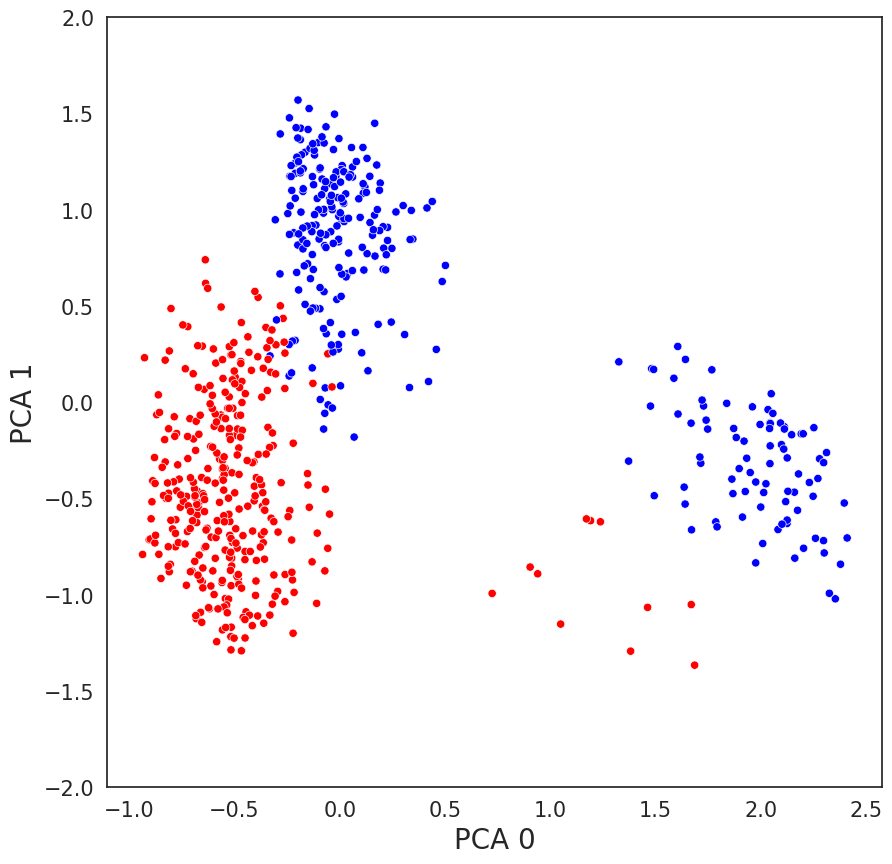

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(LEFT_RIGHT_DF))
reduced = reduced.rename(columns={0: "PCA0", 1: "PCA1"})

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.set(style="white")
colors = LEFT_RIGHT_DF['voted_left'].map({0: 'red', 1: 'blue'})
ax = sns.scatterplot(x='PCA0', y='PCA1', color=colors, data = reduced)
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PCA 0", fontsize = 20)
plt.ylabel("PCA 1", fontsize = 20)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
best_metric = -10
best_kmean = ''
best_K = -1
metric_history = []
for K_iterator in range(2,11):
    kmeans = KMeans(n_clusters=K_iterator, init='random')
    kmeans.fit(reduced)
    metric = silhouette_score(reduced, kmeans.labels_)
    if metric > best_metric:
        best_K = K_iterator
        best_metric = metric
        best_kmeans = kmeans
    metric_history.append([K_iterator,metric])





In [ ]:
centroids_df = pd.DataFrame(data=best_kmeans.cluster_centers_,columns=reduced.columns)

In [ ]:
reduced ['Cluster'] = best_kmeans.predict(reduced)

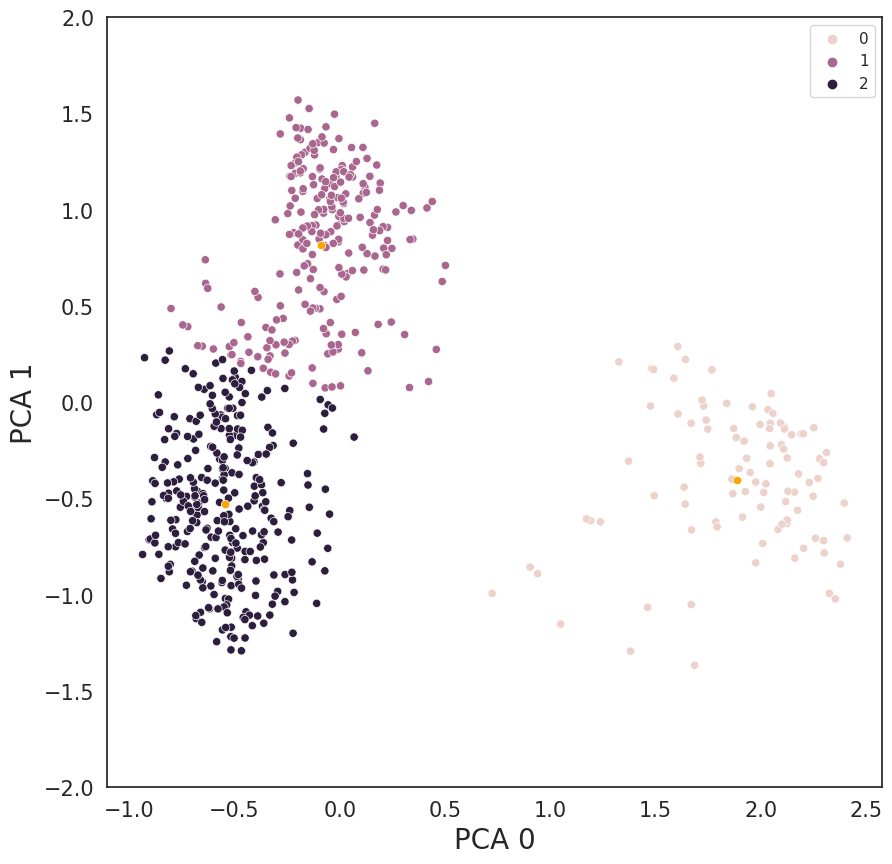

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.set(style="white")
ax = sns.scatterplot(x="PCA0", y="PCA1", hue='Cluster', data = reduced)
ax = sns.scatterplot(data=centroids_df,x='PCA0', y='PCA1', color="Orange")
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PCA 0", fontsize = 20)
plt.ylabel("PCA 1", fontsize = 20)
plt.show()

#SILHOUETTE METHOD

In [ ]:
from sklearn.cluster import KMeans
silhouette_list = []
for K_iter in range(2,6): # K=2,3,4,5
    kmeans = KMeans(n_clusters=K_iter, init='random')
    kmeans.fit(reduced)
    silhouette_list.append([K_iter,silhouette_score(reduced, kmeans.labels_)])


In [ ]:
    silhouette_list

[[2, 0.5431059361533009],
 [3, 0.7007851962183841],
 [4, 0.6104366471912307],
 [5, 0.5191026021918621]]

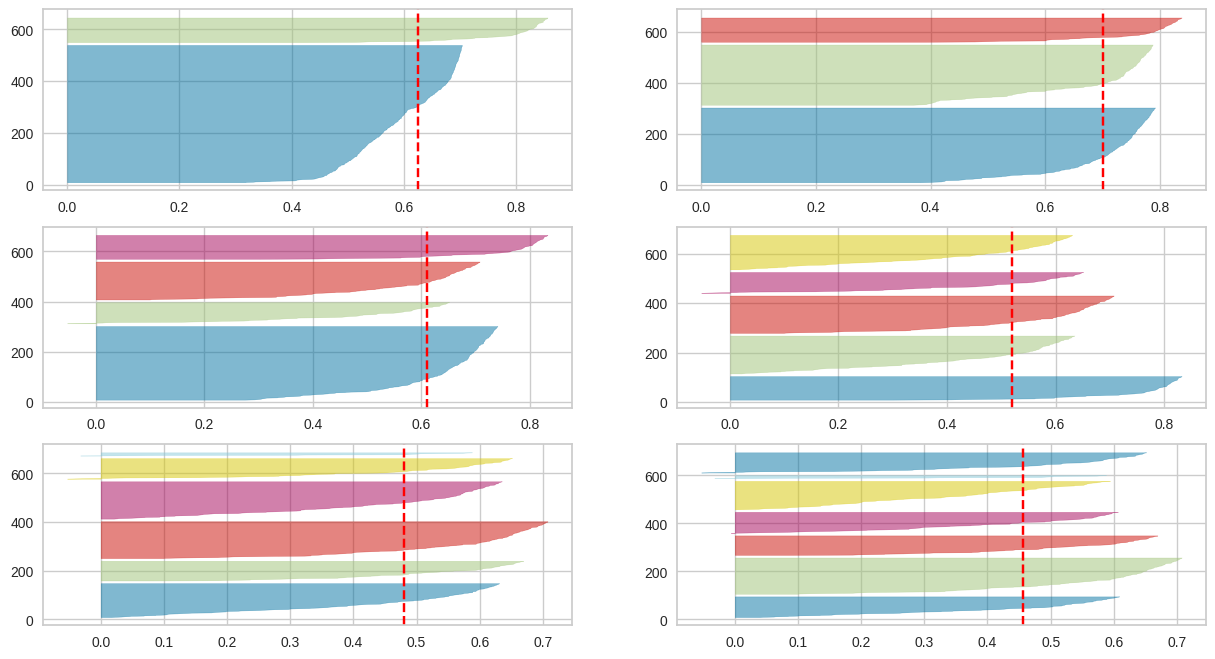

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(reduced)

# ELBOW METHOD

In [ ]:
from sklearn.cluster import KMeans
K_list = []
WCSS_list = []
for K_iter in range(2,10):
    kmeans = KMeans(n_clusters=K_iter, init='random')
    kmeans.fit(reduced)
    K_list.append(K_iter)
    WCSS_list.append(kmeans.inertia_)

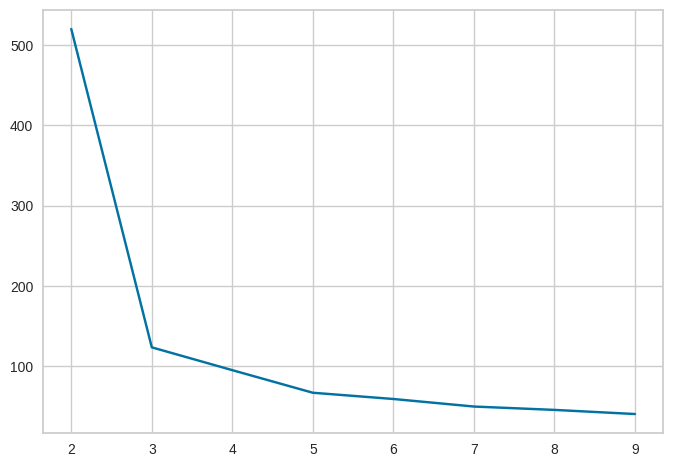

In [ ]:
sns.lineplot(x = K_list, y = WCSS_list);

#Q-8
we got the same K optimal in those 2 methods
K=3

#Q-9

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(reduced)

In [ ]:
centroids_df = pd.DataFrame(data=kmeans.cluster_centers_,columns=reduced.columns)

In [ ]:
reduced['Predicted Class'] = kmeans.predict(reduced)

<Axes: title={'center': 'Population Vote'}, xlabel='PCA0', ylabel='PCA1'>

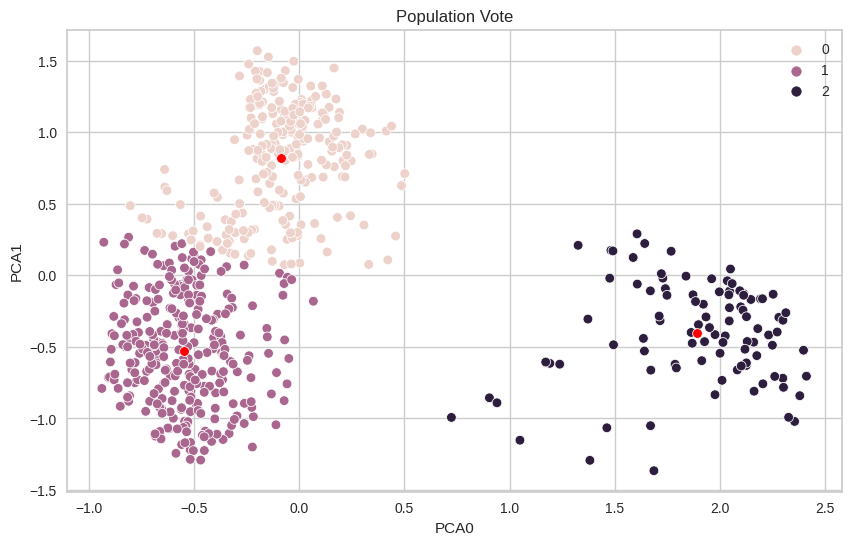

In [ ]:
import matplotlib.cm as cm
ax = plt.figure(figsize=(10,6))
sns.scatterplot(data=reduced,x='PCA0', y='PCA1', hue=reduced['Predicted Class']).set_title("Population Vote")
sns.scatterplot(data=centroids_df,x='PCA0', y='PCA1', color="red")

#Q10

In [ ]:
Clean_Data['Cluster'] = reduced ['Predicted Class']


In [ ]:
look_data=Clean_Data.groupby('Cluster').mean()
look_data.to_excel('CCC.xlsx')
look_data

,What do you think of Israel's situation today?,How much you trust in each of these institutions: the media,How much you trust in each of these institutions: the Supreme Court,How much you trust in each of these institutions: the police,How much you trust in each of these institutions: President of the State,How much you trust in each of these institutions: the Kneset,How much you trust in each of these institutions: the IDF,How much you trust in each of these institutions: the government,How much do you trust in each of these institutions: the parties,Do you agree or disagree that Israel should have more rights to Jewish citizens than non-Jewish citizens:,...,(Arabs) Are you:_No Arabic,(Arabs) Are you:_Other,What stronger tension today in Israeli society? (Presented in rotation)_Do not know,What stronger tension today in Israeli society? (Presented in rotation)_Tension between jews and arabs,What stronger tension today in Israeli society? (Presented in rotation)_Tension between mizrahi and ashkenazim,What stronger tension today in Israeli society? (Presented in rotation)_Tension between rich and poor,What stronger tension today in Israeli society? (Presented in rotation)_The tension between religious and secular,What stronger tension today in Israeli society? (Presented in rotation)_The tension between right and left,voted_left,sum_answers
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,3.173267,2.084158,2.534653,2.252475,2.688119,1.905941,3.227723,2.054455,1.653465,2.262376,...,0.920792,0.0,0.029703,0.465347,0.039604,0.029703,0.064356,0.371287,0.475248,10.608911
1.0,3.051383,2.007905,2.458498,2.209486,2.612648,2.019763,3.150198,2.039526,1.683794,2.347826,...,0.928854,0.0,0.047431,0.403162,0.043478,0.075099,0.079051,0.351779,0.422925,10.743083
2.0,2.743902,1.573171,1.853659,1.853659,2.097561,1.731707,2.548780,1.670732,1.743902,2.426829,...,0.719512,0.0,0.085366,0.414634,0.012195,0.085366,0.182927,0.219512,0.402439,10.512195


# ההבדלים המרכזיים בין הקבוצות:


*   בקבוצה 0 יש הרבה יותר ערבים מקבוצות 1 ו-2 (לפי עמודת לא ערבים ומוסלמים)
*   ניתן לראות שקבוצה 0 פחות סומכת על המוסדות במדינה כמו משטרה,כנסת,מדיה וכו' מקבוצות  1 ו2
*   ניתן לראות שקבוצה 0 פחות חושבת שהמחלוקת הגדולה במדינה היא בין מזרחים
 ואשכנזים ובין ימניים לשמאלנים(ככל הנראה בגלל שהיא קבוצה שמורכבת יותר מערבים) לעומת זאת הם חושבים שהמחלוקת בין דתיים לחילוניים הכי גדולה לעומת קבוצות 1 ו-2
*   ניתן לראות שקבוצה 0 הם אנשים צעירים יותר מקבוצות 1 ו-2 שדי דומות בגיל בניהם
*   ניתן לראות שבקבוצות 1 ו-2 כולם מילאו את השאלון דקך האינטרנט לעומת קבוצה 0 שכמעת מחצית מהם מלאו את השאלון בטלפון
*   ניתן לראות שקבוצות 1 ו-2 מורכבות בעיקר מחילונים ולא מאמינים לעומת קבוצה 0 שמורבת מ45 אחוז אורתודקסים וערבים
*   ניתן לראות שקבוצה 0 רובם מתגוררים בצפון ירושלים והדרום לעומת קבוצות 1 ו-2 שגרות במרכז ובתל אביב
*   ניתן לראות שקבוצה 0 מורכבת מרוב אנשים שהצביעו למפלגות החרדיות והערביות לעומת קבוצות 1 ו-2 שהצביעו לרוב למפלגות הימין/שמאל








#Q11-correlation

In [ ]:
Clean_Data['sum_answers']= Clean_Data.iloc[:,19:30].sum(axis=1)
Clean_Data['sum_answers']

0      10
1      11
2      11
3      10
4      11
       ..
743    11
746    10
747    10
749    11
750    11
Name: sum_answers, Length: 627, dtype: int64

In [ ]:
correlation_matrix=Clean_Data[['sum_answers','voted_left','Is immigrant',"What do you think of Israel's situation today?",'What are you?', 'How old are you?', 'sector','district_Center','district_Haifa', 'district_Jerusalem', 'district_Judea and samaria', 'district_North','district_South', 'district_Tel aviv']].corr()
correlation_matrix

,sum_answers,voted_left,Is immigrant,What do you think of Israel's situation today?,What are you?,How old are you?,sector,district_Center,district_Haifa,district_Jerusalem,district_Judea and samaria,district_North,district_South,district_Tel aviv
sum_answers,1.000000,0.041066,-0.075579,0.010004,0.079121,-0.113657,-0.047541,0.045902,0.001941,-0.082030,0.013060,-0.005902,-0.026285,0.025978
voted_left,0.041066,1.000000,0.005111,0.097713,-0.013796,0.104163,0.360642,-0.001695,0.081276,-0.159012,-0.123646,0.155917,-0.035222,-0.018892
Is immigrant,-0.075579,0.005111,1.000000,0.059856,-0.017337,0.095299,-0.163770,-0.054071,0.102111,-0.062423,-0.029885,-0.106368,0.160128,-0.000228
What do you think of Israel's situation today?,0.010004,0.097713,0.059856,1.000000,0.096919,0.148697,0.007712,0.075793,0.063596,-0.078750,-0.050683,-0.012849,0.007713,-0.051032
What are you?,0.079121,-0.013796,-0.017337,0.096919,1.000000,0.027704,-0.029966,0.025092,0.020416,0.015131,-0.026080,-0.057682,0.079627,-0.052010
How old are you?,-0.113657,0.104163,0.095299,0.148697,0.027704,1.000000,-0.097061,0.077295,0.041399,-0.058929,0.036728,-0.052742,-0.048592,-0.005417
sector,-0.047541,0.360642,-0.163770,0.007712,-0.029966,-0.097061,1.000000,-0.170589,0.082229,-0.094115,-0.086648,0.538105,-0.118610,-0.199993
district_Center,0.045902,-0.001695,-0.054071,0.075793,0.025092,0.077295,-0.170589,1.000000,-0.222879,-0.169787,-0.116279,-0.267539,-0.213498,-0.283307
district_Haifa,0.001941,0.081276,0.102111,0.063596,0.020416,0.041399,0.082229,-0.222879,1.000000,-0.116229,-0.079600,-0.183146,-0.146152,-0.193940
district_Jerusalem,-0.082030,-0.159012,-0.062423,-0.078750,0.015131,-0.058929,-0.094115,-0.169787,-0.116229,1.000000,-0.060638,-0.139518,-0.111337,-0.147741


#התהליך שעשיתי הוא כזה:
##new column - sum answers
יצרתי עמודה חדשה שסופרת כמה פעמים כל בן אדם ענה על השאלות בתשובה שהיא לא סירוב או "לא יודע"
כלומר לספור את כמות הפעמים של התשובות (הנכונות שלו לענות).
אחרי זה ראיתי בעמודה החדשה שרוב האנשים ענו על כל השאלות(או רק לשאלה אחת לא ענו)  ומעטים ענו על ממש מעט.
יצרתי טבלת קורולציה בין משתנים שחשבתי שרלוונטי לעמודה שיצרתי כמו:הצביע שמאל,מאגר,מה הוא חושב על הסיטואציה היום, מי הוא,בן כמה הוא,מגזר ואיזור מגורים.
ובתוצאות הקורולציה לא יצא משהו "מעניין" או בעל עוצמת קורולציה גבוהה (גם לא שלילית)

In [ ]:
Clean_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 750
Data columns (total 76 columns):
 #   Column                                                                                                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                    --------------  -----  
 0   What do you think of Israel's situation today?                                                                                                                                                                                            627 non-null    int64  
 1   How much you trust in each of these institutions: the media                                          

In [ ]:
LEFT_RIGHT_DF.to_excel('AAA.xlsx')
reduced.to_excel('BBB.xlsx')